<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/intro/tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to tensorflow 2.0

We show some simple examples of how to use TF 2.0 via the keras interface. 

**Make sure you select 'GPU' from the 'Runtime' tab at the top of this page.**

For more details, see 

* [The official TF tutorials](https://www.tensorflow.org/beta/tutorials)
* ["Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow v2"](https://github.com/ageron/handson-ml2), an excellent book by Aurelion Geron.
* ["Deep learning with Python"](https://github.com/fchollet/deep-learning-with-python-notebooks), a short book by Francois Chollet on Keras.



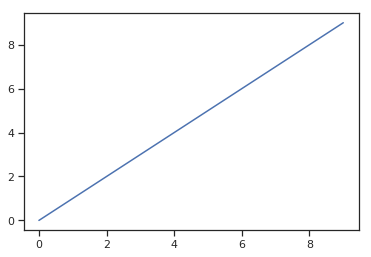

In [1]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

from IPython import display

import sklearn

import seaborn as sns;
sns.set(style="ticks", color_codes=True)

import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows

# Check we can plot stuff
plt.figure()
plt.plot(range(10))

# We can make some wrappers around random number generation
# so it works even if we switch from numpy to JAX
import numpy as onp # original numpy

def set_seed(seed):
    onp.random.seed(seed)
    
def randn(*args):
    return onp.random.randn(*args)
        
def randperm(args):
    return onp.random.permutation(args)

In [2]:
# Tensorflow 2.0
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras

print("tf version {}".format(tf.__version__))
if tf.test.is_gpu_available():
    print(tf.test.gpu_device_name())
else:
    print("TF cannot find GPU")

TensorFlow 2.x selected.
tf version 2.0.0-beta1
/device:GPU:0


### MLP applied to Fashion MNIST <a class="anchor" id="fashion-keras-mlp"></a>

In [0]:
# Fashion MNIST has the same size and shape as MNIST, but the images
# are of items of clothing, rather than handwritten digits.
# Fashion-MNIST is slightly harder to than regular MNIST.

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

print(np.shape(train_images))
print(np.shape(test_images))

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


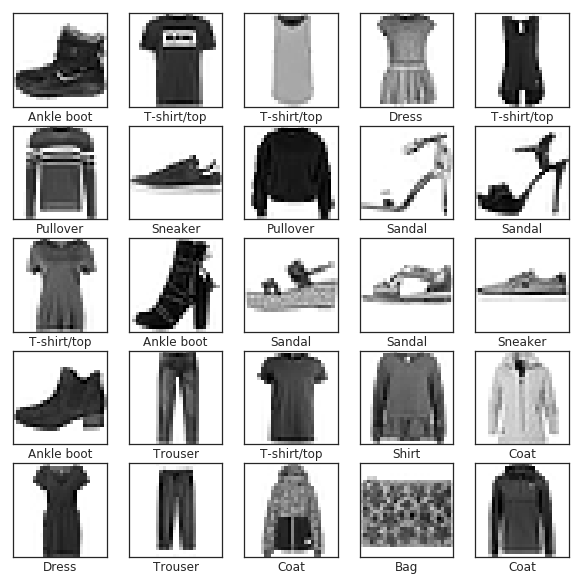

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
#save_fig("fashion-mnist-data.pdf")
plt.show()

In [0]:
from time import time

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# We use sparse categorical cross entropy since the labels are integers, not dense one-hot vectors.
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# We just train for 2 epochs because it is faster, and
# and because it produces more errors, which makes for a more interesting plot :)
time_start = time()
model.fit(train_images, train_labels, epochs=2)
print('time spent training {:0.3f}'.format(time() - time_start))


W0824 22:38:24.043787 139766091544448 deprecation.py:323] From /tensorflow-2.0.0b1/python3.6/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 5s 76us/sample - loss: 0.5018 - accuracy: 0.8230
Epoch 2/2
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3775 - accuracy: 0.8629
time spent training 8.971


In [0]:
# Overall accuracy
train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Train accuracy:', train_acc)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

60000/60000 [==============================] - 2s 35us/sample - loss: 0.3362 - accuracy: 0.8769
Train accuracy: 0.87693334
10000/10000 [==============================] - 0s 36us/sample - loss: 0.3837 - accuracy: 0.8593
Test accuracy: 0.8593


In [0]:
predictions = model.predict(test_images)
print(np.shape(predictions))

# To apply prediction to a single image, we need to reshape to an (N,D,D) tensor where N=1
img = test_images[0]
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single.shape)

(10000, 10)
(1, 28, 28)
(1, 10)


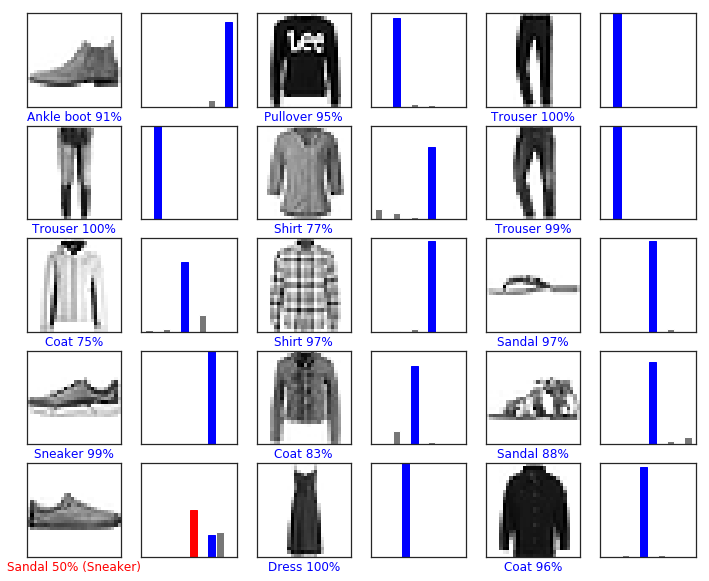

In [0]:
def plot_image_and_label(predictions_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
    plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
                                100*np.max(predictions_array)),
                                color=color)
  else:
    color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_label_dist(predictions_array, true_label):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
  
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image_and_label(predictions[i], test_labels[i], test_images[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_label_dist(predictions[i], test_labels[i])
#save_fig("fashion-mnist-predictions.pdf")
plt.show()

### MLP applied to IMDB movie reviews (sentiment analysis) <a class="anchor" id="imdb-keras-mlp"></a>

We use the IMDB movie review dataset, where the task is to classify the sentiment of the review as positive or negative. We use the preprocessed version of the dataset from https://www.tensorflow.org/datasets

In [0]:
import tensorflow_datasets as tfds

# TFDS version is slow

if 0:
  imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True) # Takes about 1 minute in colab!
  #imdb, info = tfds.load('imdb_reviews/subwords32k', with_info=True, as_supervised=True) # Takes forever!!
  tokenizer = info.features['text'].encoder

  print(info)
  train_dataset, test_data = imdb['train'], imdb['test']
  prefix = train_dataset.batch(1).take(3) 
  for data, label in prefix:
      print(data)
      print(tokenizer.decode(data.numpy()[0]))


In [0]:
# Keras version of IMDB is  much faster
imdb = keras.datasets.imdb

vocab_size = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)
print(np.shape(train_data)) # (25000)
print(train_data[0])
# [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941...]

word_index = imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


print(decode_review(train_data[0]))

(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1646592/1641221 [==============================] - 

In [0]:
# Keras padding - every example in the dataset has fixed length

train_data = keras.preprocessing.sequence.pad_sequences(
    train_data, value=word_index["<PAD>"], padding='post', maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(
    test_data, value=word_index["<PAD>"], padding='post', maxlen=256)

print(train_data.shape)
print(train_data[0])

(25000, 256)
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   2

In [0]:
embed_size = 16
def make_model(embed_size):
  tf.random.set_seed(42)
  np.random.seed(42)
  model = keras.Sequential()
  model.add(keras.layers.Embedding(vocab_size, embed_size))
  model.add(keras.layers.GlobalAveragePooling1D())
  model.add(keras.layers.Dense(16, activation=tf.nn.relu))
  model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
  return model

model = make_model(embed_size)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
x_val = train_data[:10000]
x_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)



W0824 23:13:27.814611 139829809821568 deprecation.py:323] From /tensorflow-2.0.0b1/python3.6/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15000 samples, validate on 10000 samples
Epoch 1/50
15000/15000 [==============================] - 2s 110us/sample - loss: 0.6920 - acc: 0.5268 - val_loss: 0.6897 - val_acc: 0.5398
Epoch 2/50
15000/15000 [==============================] - 0s 32us/sample - loss: 0.6851 - acc: 0.6462 - val_loss: 0.6802 - val_acc: 0.7188
Epoch 3/50
15000/15000 [==============================] - 0s 31us/sample - loss: 0.6703 - acc: 0.7531 - val_loss: 0.6617 - val_acc: 0.7451
Epoch 4/50
15000/15000 [==============================] - 0s 32us/sample - loss: 0.6444 - acc: 0.7657 - val_loss: 0.6324 - val_acc: 0.7730
Epoch 5/50
15000/15000 [==============================] - 0s 29us/sample - loss: 0.6071 - acc: 0.7929 - val_loss: 0.5938 - val_acc: 0.7902
Epoch 6/50
15000/15000 [==============================] - 0s 30us/sample - loss: 0.5611 - acc: 0.8135 - val_loss: 0.5496 - val_acc: 0.8088
Epoch 7/50
15000/15000 [==============================] - 0s 29us/sample - loss: 0.5108 - acc: 0.8344 - val_loss: 0

In [0]:
history_dict = history.history
print(history_dict.keys())

results = model.evaluate(test_data, test_labels)
print(results)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
25000/25000 [==============================] - 2s 61us/sample - loss: 0.3841 - acc: 0.8657
[0.3840938210630417, 0.86568]


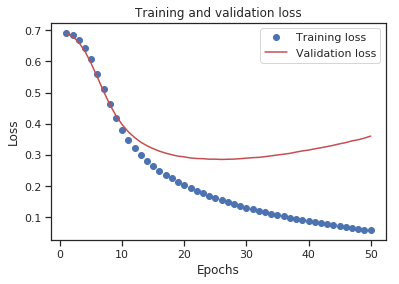

In [0]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
fig, ax = plt.subplots()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'r-', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#save_fig("imdb-loss.pdf")
plt.show()

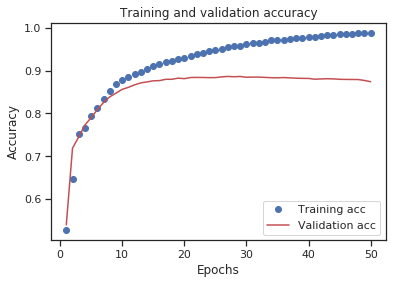

In [0]:
fig, ax = plt.subplots()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#save_fig("imdb-acc.pdf")
plt.show()


In [0]:
# Now turn on early stopping
# https://chrisalbon.com/deep_learning/keras/neural_network_early_stopping/
# Also, make the logging per iteration less verbose (show progress dots...)

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
callbacks = [PrintDot(),
             keras.callbacks.EarlyStopping(monitor='val_acc', patience=2),
             keras.callbacks.ModelCheckpoint(filepath='imdb_keras_best_model.ckpt',
                                             monitor='val_acc', save_best_only=True)]


........................

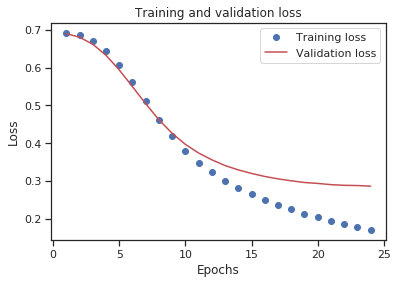

In [0]:
# Reset parameters to a new random state
model = make_model(embed_size)
history = model.fit(
    x_train, y_train, epochs=50, batch_size=512, 
    validation_data=(x_val, y_val), verbose=0, callbacks=callbacks)

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
fig, ax = plt.subplots()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'r-', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#save_fig("imdb-loss-early-stop.pdf")
plt.show()



# Tensorflow datasets (TFDS)

Tensorflow has an easy way to load data, and convert it into a stream of miniatches, as we show below.


The functionality similar functionality to PyTorch DataLoader, but natively supports infinite streams via the `repeat` function. Also, all minibatches have the same size (note how we 'wrap around' the dataset).


In [3]:
N_train = 5
D = 4            
set_seed(0)    
X = randn(N_train, D)
y = randn(N_train)
batch_size = 2


dataset = tf.data.Dataset.from_tensor_slices({"X": X, "y": y})
batches = dataset.repeat().batch(batch_size)

step = 0
num_minibatches = 4
for batch in batches:
    if step >= num_minibatches:
        break
    x, y = batch["X"].numpy(), batch["y"].numpy()
    print(y)
    step = step + 1

[-2.55298982  0.6536186 ]
[ 0.8644362  -0.74216502]
[ 2.26975462 -2.55298982]
[0.6536186 0.8644362]



TF also has preprocessed datasets, available from
https://www.tensorflow.org/datasets

In [4]:
import tensorflow_datasets as tfds
dataset = tfds.load(name="mnist", split=tfds.Split.TRAIN)

batches = dataset.repeat().batch(batch_size)
step = 0
for batch in batches:
    if step >= num_minibatches:
        break
    x, y = batch['image'], batch['label']
    #print(batch)
    print(y)
    step = step + 1

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

W0826 04:10:08.968632 140017781929856 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


W0826 04:10:13.328977 140017781929856 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.
tf.Tensor([7 0], shape=(2,), dtype=int64)
tf.Tensor([4 9], shape=(2,), dtype=int64)
tf.Tensor([1 9], shape=(2,), dtype=int64)
tf.Tensor([8 8], shape=(2,), dtype=int64)
